In [3]:
import numpy as np
import numpy.random as npr
import sys
import heapq

In [4]:
push = heapq.heappush
pop = heapq.heappop

In [5]:
def invperc(L):
    L = int(L)

    adj = [(-1, 0, 0), (1, 0, 0), (0, -1, 0), (0, 1, 0), (0, 0, -1), (0, 0, 1)]

    visited = np.zeros((L + 1, L, L), dtype = bool)

    rs = npr.random((6 * (L + 1) * L * L,))

    i = 0
    q = []
    for y in range(L):
        for z in range(L):
            q.append((0, 0, y, z))

    #print(q)
            
    while len(q) > 0:
        p, x, y, z = pop(q)

        if not visited[x, y, z]:
            visited[x, y, z] = True

            if x == L:
                break

            for dx, dy, dz in adj:
                x_ = x + dx
                y_ = (y + dy) % L
                z_ = (z + dz) % L
                if x_ > 0 and not visited[x_, y_, z_]:
                    push(q, (rs[i], x_, y_, z_))
                    i += 1

    return visited

In [6]:
def invperc2(L):
    L = int(L)

    adj = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    visited = np.zeros((L + 1, L), dtype = bool)

    rs = npr.random((6 * (L + 1) * L,))

    i = 0
    q = []
    for y in range(L):
        q.append((0, 0, y))

    while len(q) > 0:
        p, x, y = pop(q)

        if not visited[x, y]:
            visited[x, y] = True

            if x == L:
                break

            for dx, dy in adj:
                x_ = x + dx
                y_ = (y + dy) % L
                if x_ > 0 and not visited[x_, y_]:
                    push(q, (rs[i], x_, y_))
                    i += 1

    return visited

In [ ]:
%%time
L = int(2**14)
siteVisited = invperc2(L)

In [8]:
np.sum(siteVisited[:,:])

347101

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

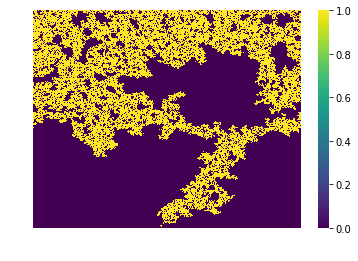

In [10]:
fig = plt.figure()
ax = plt.subplot(111)

sns.heatmap(siteVisited, ax=ax, cmap=plt.cm.viridis)
ax.set_axis_off()